# Melanoma or not

*Analysing pigmented skin lesions*

---

## Problem Statement
---

Melanomas are amongst the deadliest cancers, accounting for 75 per cent of all skin cancer deaths. The good news is, most types of skin cancer are highly curable if detected early.

However, it often can be difficult to identify and detect because they are usually painless and can resemble benign spots and moles, and many probably dismiss it as nothing serious or simply finds it a hassle just to make time for a trip to diagnose it.


Hence, I intend to create a classification model to identify if a particular skin lesion is benign or malignant. 
The dataset I am looking at is the [HAM10000 dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T), which is a large collection of multi-source dermatoscopic images of common pigmented skin lesions. 
<!-- ![image.png](attachment:image.png) -->

The dataset consist of 10015 images from collated by various seven diagnostic categories, including malignant (melanomas (MELs), basal cell carcinomas (BCCs) and actinic keratoses and intraepithelial carcinomas (AKIECs)) and benign (melanocytic nevi (NVs), benign keratinocytic lesions (BKLs), dermatofibromas (DFs) and vascular lesions (VASCs)) proliferations

### Library imports

In [1]:
from IPython.core.display import HTML
from IPython.display import DisplayObject
import pandas as pd
import seaborn as sns
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Image


### Data import  
`HAM10000_metadata.csv`

In [2]:
df = pd.read_csv("../data/HAM10000_metadata.csv")

In [3]:
#make copy of df
df_initial = df.copy()
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [4]:
def basic_eda(df, name):
    print(f"""---------------------------------------\n
{name.upper()} dataframe \n
Rows: {df.shape[0]}             Columns: {df.shape[1]}
Duplicated rows: {(df.duplicated(keep=False) == True).sum()}
Columns:
{pd.concat([pd.DataFrame(data=df.dtypes, columns=['data_type']),
         pd.DataFrame(data=df.isnull().sum(), columns=['num_nulls']),
         pd.DataFrame(data=df.notnull().sum(), columns=['num_not_nulls']),
         pd.DataFrame(data=df.nunique(), columns=['unique_values']),
         
         ], axis=1)}
    \n""")
print("DATAFRAME INFORMATION")    

#call function    
basic_eda(df, "metadata")

DATAFRAME INFORMATION
---------------------------------------

METADATA dataframe 

Rows: 10015             Columns: 7
Duplicated rows: 0
Columns:
             data_type  num_nulls  num_not_nulls  unique_values
lesion_id       object          0          10015           7470
image_id        object          0          10015          10015
dx              object          0          10015              7
dx_type         object          0          10015              4
age            float64         57           9958             18
sex             object          0          10015              3
localization    object          0          10015             15
    



In [6]:
# !pip install pandas-profiling

import pandas as pd
from pandas_profiling import ProfileReport

df_initial.profile_report()

In [ ]:
fig, ax = plt.subplots(nrows = 5, ncols = 1, figsize = (18, 40))

sns.color_palette("Purples")
sns.barplot(x=df_initial['dx'].value_counts(ascending=True).index,
            y=df_initial['dx'].value_counts(ascending=True).values,
            ax=ax[0], palette='Purples')
ax[0].set_title('Distribution of Diagnostic Categories', fontsize=16)
ax[0].set_ylabel('Diagnostic Categories', fontsize=14)
ax[0].set_ylabel('Frequency', fontsize=14)
ax[0].tick_params(axis='both', labelsize=14)


sns.countplot(x=df_initial['dx_type'].sort_values(),ax=ax[1])
ax[1].set_title('Distribution of Diagnostic Categories Types', fontsize=16)
ax[1].set_xlabel('Diagnostic Categories Types', fontsize=14)
ax[1].set_ylabel('Frequency', fontsize=14)
ax[1].tick_params(axis='both', labelsize=14)

sns.histplot(x=df_initial['age'].sort_values(),bins=10, ax=ax[2])
ax[2].set_title('Distribution of age', fontsize=16)
ax[2].set_xlabel('Age group', fontsize=14)
ax[2].set_ylabel('Frequency', fontsize=14)
ax[2].tick_params(axis='both', labelsize=14)

sns.countplot(x=df_initial['sex'].sort_values(),ax=ax[3])
ax[3].set_title('Distribution of Gender', fontsize=16)
ax[3].set_xlabel('Gender', fontsize=14)
ax[3].set_ylabel('Frequency', fontsize=14)
ax[3].tick_params(axis='both', labelsize=14)

sns.barplot(x=df_initial['localization'].value_counts(ascending=True).index,
            y=df_initial['localization'].value_counts(ascending=True).values, ax=ax[4], palette='Purples')
ax[4].set_title('Distribution of anatomical site', fontsize=16)
ax[4].set_xlabel('Anatomical sites', fontsize=14)
ax[4].set_ylabel('Frequency', fontsize=14)
ax[4].tick_params(axis='both', labelsize=14)

plt.tight_layout();

<AxesSubplot:xlabel='dx', ylabel='age'>

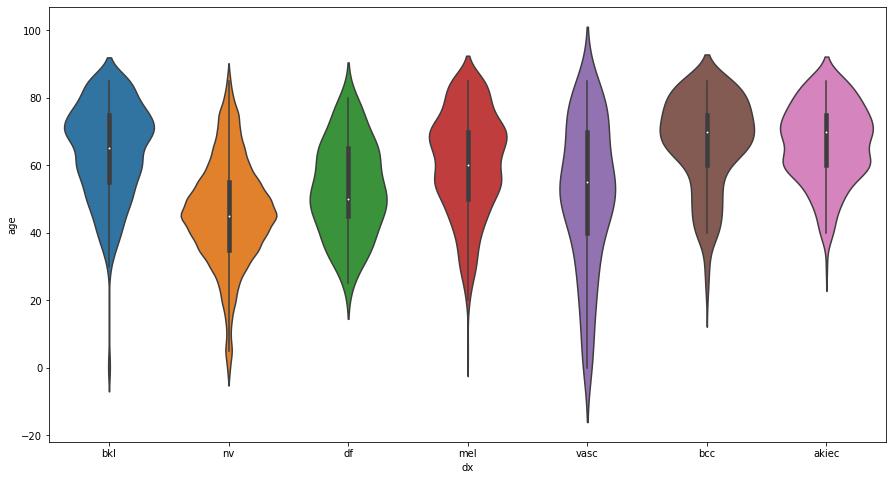

In [7]:
plt.figure(figsize=(15,8))
# sns.displot(x='dx', y='age', data=df_initial)
sns.violinplot(x=df_initial['dx'], y=df_initial['age'])

In [8]:
df_initial.groupby(pd.cut(df_initial['age'],bins=np.arange(0, 100, 10)))['dx'].describe()


,count,unique,top,freq
age,,,,
"(0, 10]",127,4,nv,120
"(10, 20]",246,4,nv,231
"(20, 30]",711,7,nv,631
"(30, 40]",1738,7,nv,1514
"(40, 50]",2486,7,nv,2028
"(50, 60]",1812,7,nv,1140
"(60, 70]",1487,7,nv,599
"(70, 80]",1022,7,nv,328
"(80, 90]",290,6,bkl,93


In [9]:
df_initial.groupby('dx')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
dx,,,,,,,,
akiec,327.0,66.529052,11.476232,30.0,60.0,70.0,75.0,85.0
bcc,514.0,66.828794,13.656959,20.0,60.0,70.0,75.0,85.0
bkl,1089.0,64.283747,14.120715,0.0,55.0,65.0,75.0,85.0
df,115.0,53.043478,13.551326,25.0,45.0,50.0,65.0,80.0
mel,1111.0,60.679568,15.189847,5.0,50.0,60.0,70.0,85.0
nv,6660.0,46.477477,15.183275,0.0,35.0,45.0,55.0,85.0
vasc,142.0,51.373239,21.644651,0.0,40.0,55.0,70.0,85.0


In [10]:
#there could be more than 1 photo taken for each unique lesion
#only 7470 unique lesions in the dataset
df_initial[df_initial['lesion_id'].duplicated(keep=False)]

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


### Creating a file path

In [11]:
# !pip install pathlib
from pathlib import Path

path_p1: Path = Path("/Users/kayle/DSI-17/materialswking/Capstone_Project/skin/data/HAM10000_images_part_1/")
path_p2: Path = Path("/Users/kayle/DSI-17/materialswking/Capstone_Project/skin/data/HAM10000_images_part_2/")
    
    

In [12]:
path_fold = "../data"

In [13]:
import os
img_name = os.listdir(path_p1)
print(f"{len(img_name)} images in part 1 folder")
folder = [path_fold +'/HAM10000_images_part_1/'] * len(img_name)
img_name = img_name + os.listdir(path_p2)

5000 images in part 1 folder


In [14]:
len(img_name)
print(f"{len(img_name)} images in part 1 and part 2 folders")

10016 images in part 1 and part 2 folders


In [15]:
folder = folder + ([path_fold +'/HAM10000_images_part_2/'] * (10016-5000))
len(folder)

10016

In [16]:
df_img_path = pd.DataFrame(data=(img_name,folder), index=['img_name', "folder"]).T
df_img_path.head()

,img_name,folder
0,ISIC_0026784.jpg,../data/HAM10000_images_part_1/
1,ISIC_0028971.jpg,../data/HAM10000_images_part_1/
2,ISIC_0026948.jpg,../data/HAM10000_images_part_1/
3,ISIC_0026790.jpg,../data/HAM10000_images_part_1/
4,ISIC_0028965.jpg,../data/HAM10000_images_part_1/


In [17]:
df_img_path['image_id'] = df_img_path['img_name'].map(lambda x: x.rstrip(".jpg"))
df_img_path.head()


,img_name,folder,image_id
0,ISIC_0026784.jpg,../data/HAM10000_images_part_1/,ISIC_0026784
1,ISIC_0028971.jpg,../data/HAM10000_images_part_1/,ISIC_0028971
2,ISIC_0026948.jpg,../data/HAM10000_images_part_1/,ISIC_0026948
3,ISIC_0026790.jpg,../data/HAM10000_images_part_1/,ISIC_0026790
4,ISIC_0028965.jpg,../data/HAM10000_images_part_1/,ISIC_0028965


**Save file checkpoint**  `img_path.csv`

In [18]:
#save copy to csv
df_img_path.to_csv("../data/img_path.csv", index=False)

In [19]:
df = pd.merge(df_initial, df_img_path, on='image_id')
df['file_path'] = df['folder'] + df['img_name']
df.to_csv("../data/df_v1.csv", index=False)
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,img_name,folder,file_path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,ISIC_0027419.jpg,../data/HAM10000_images_part_1/,../data/HAM10000_images_part_1/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,ISIC_0025030.jpg,../data/HAM10000_images_part_1/,../data/HAM10000_images_part_1/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,ISIC_0026769.jpg,../data/HAM10000_images_part_1/,../data/HAM10000_images_part_1/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,ISIC_0025661.jpg,../data/HAM10000_images_part_1/,../data/HAM10000_images_part_1/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,ISIC_0031633.jpg,../data/HAM10000_images_part_2/,../data/HAM10000_images_part_2/ISIC_0031633.jpg


In [ ]:
# lambda x: display(Image(filename=x))


The dataset consist of 10015 images from collated by various seven diagnostic categories, including malignant (melanomas (MELs), basal cell carcinomas (BCCs) and actinic keratoses and intraepithelial carcinomas (AKIECs)) and benign (melanocytic nevi (NVs), benign keratinocytic lesions (BKLs), dermatofibromas (DFs) and vascular lesions (VASCs)) proliferations

In [41]:
dx_names = dict(zip(df['dx'].unique(), ['benign keratinocytic lesions', 'melanocytic nevi', 'dermatofibromas',
                        'malignant melanomas', 'vascular lesions', 'basal cell carcinomas',
                        'actinic keratoses and intraepithelial carcinomas'] ))

In [42]:
dx_names

{'bkl': 'benign keratinocytic lesions',
 'nv': 'melanocytic nevi',
 'df': 'dermatofibromas',
 'mel': 'malignant melanomas',
 'vasc': 'vascular lesions',
 'bcc': 'basal cell carcinomas',
 'akiec': 'actinic keratoses and intraepithelial carcinomas'}

-----------------------------

dx: BENIGN KERATINOCYTIC LESIONS


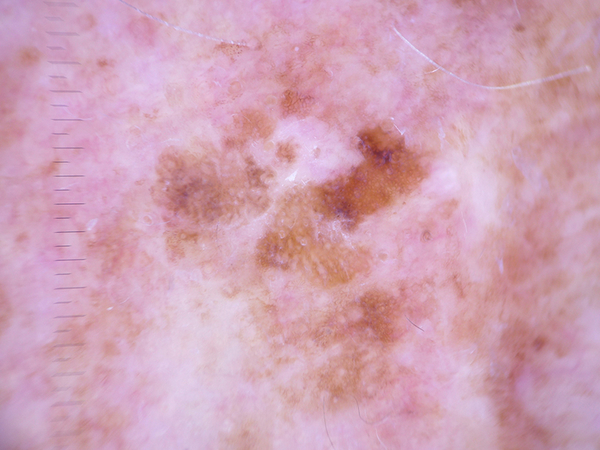

-----------------------------

dx: MELANOCYTIC NEVI


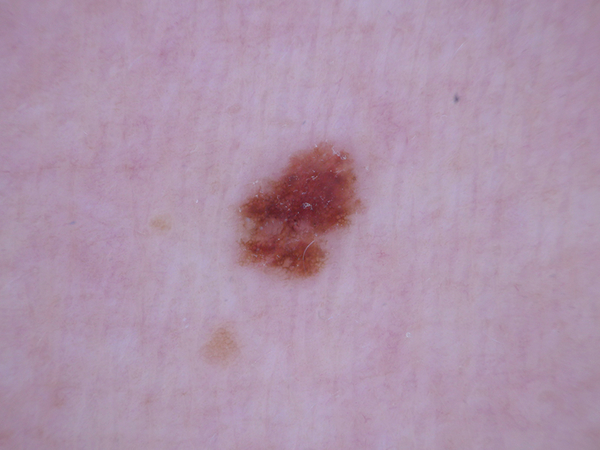

-----------------------------

dx: DERMATOFIBROMAS


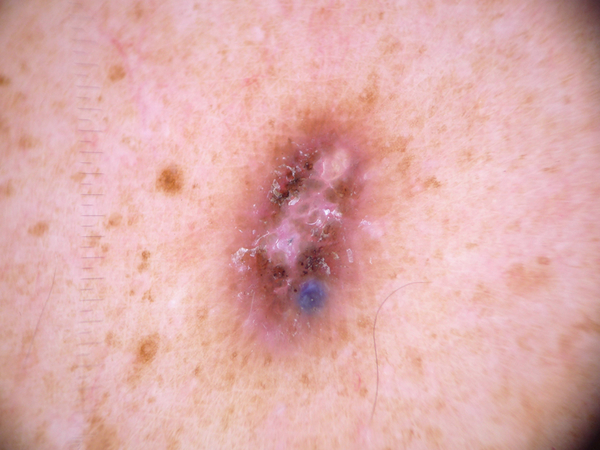

-----------------------------

dx: MALIGNANT MELANOMAS


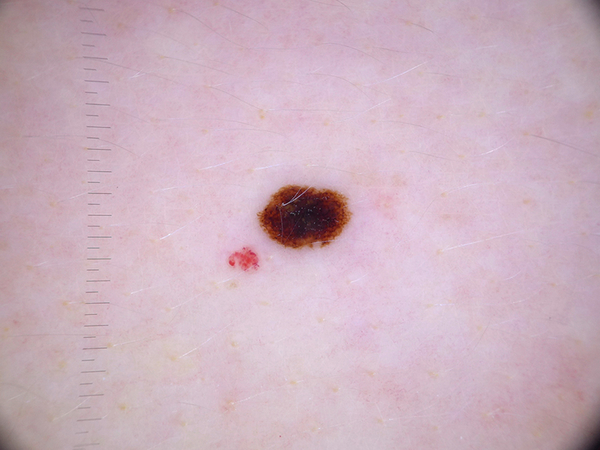

-----------------------------

dx: VASCULAR LESIONS


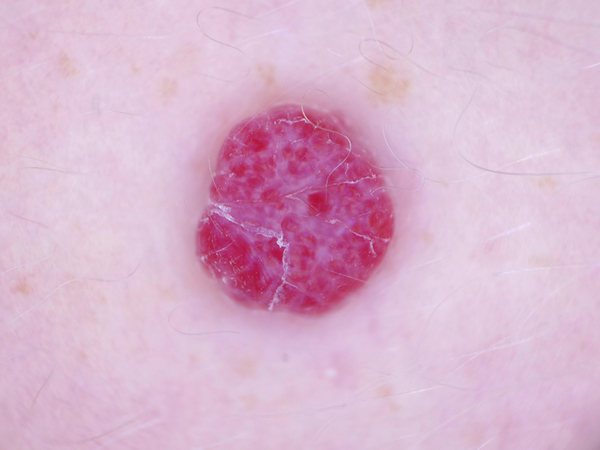

-----------------------------

dx: BASAL CELL CARCINOMAS


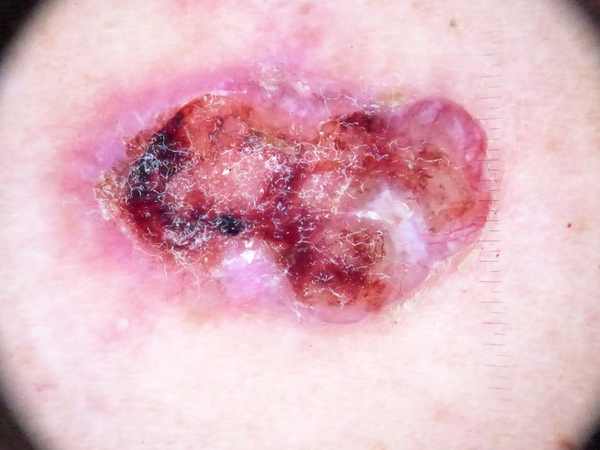

-----------------------------

dx: ACTINIC KERATOSES AND INTRAEPITHELIAL CARCINOMAS


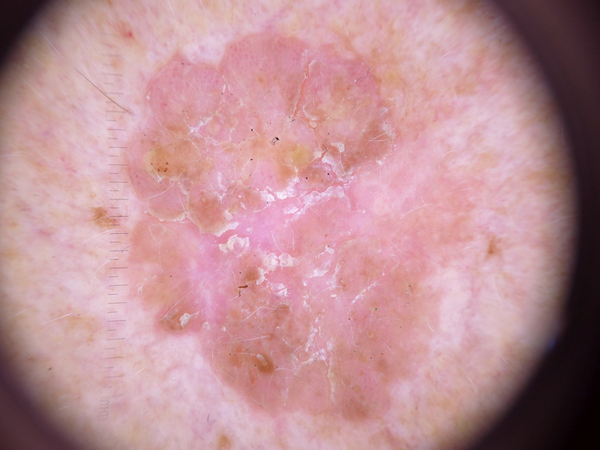

In [49]:
def preview_img(dx_value, dx_names):
    file_path = df['file_path'][df['dx'] == dx_value].iloc[0]
    print("-----------------------------\n")
    print(f"dx: {(dx_names[dx_value]).upper()}")
    display(Image(filename=file_path, width="256"))

[preview_img(x, dx_names) for x in df['dx'].unique()];

## References

1. >Tschandl, Philipp, 2018, "The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions", https://doi.org/10.7910/DVN/DBW86T, Harvard Dataverse, V2, UNF:6:CQ3Nf3d7V66S+V75BNQi5Q== [fileUNF]



 https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T



### Data Dictionary

|Feature|Type|Dataset|Description|
|:---|:---|:---:|:---|
|**lesion_id**|object|df| unique identification number of leison| 
|**image_id**|object|df| unique image number of leison| 
|**dx**|object|df| diagnostic categories|
|**dx_type**|object|df| diagnostic categories examination type|
|**age**|float|df| age of person sample dermascopic image was taken from|
|**sex**|object|df| gender of person sample dermascopic image was taken from|
|**localization**|object|df| anatomical site where sample dermascopic image was taken from|
|**img_name**|object|df| unique image number of leison with file extension|
|**folder**|object|df| file folder path containing nique image of leison|
|**file_path**|object|df| file path of unique image of leison|

---